In [1]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.pylab as pl

import os
import time
import shutil
import imageio

from skimage import io, color, img_as_ubyte, measure

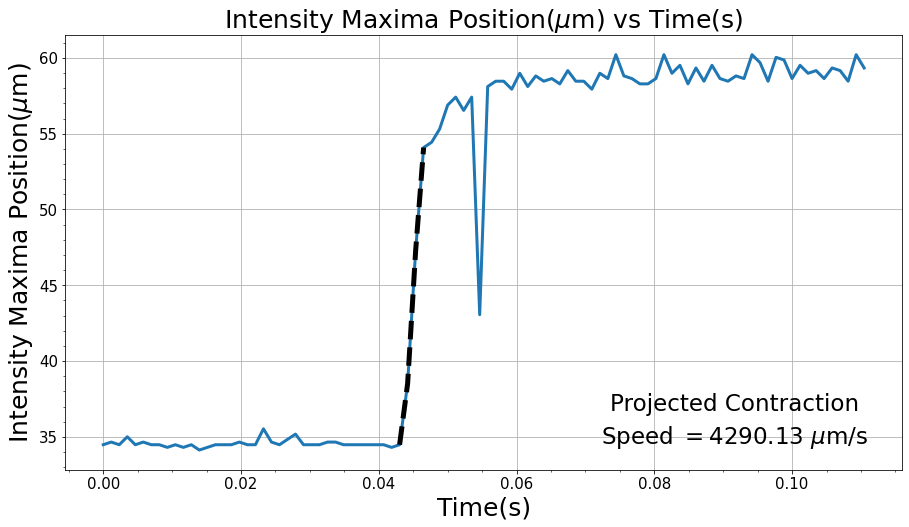

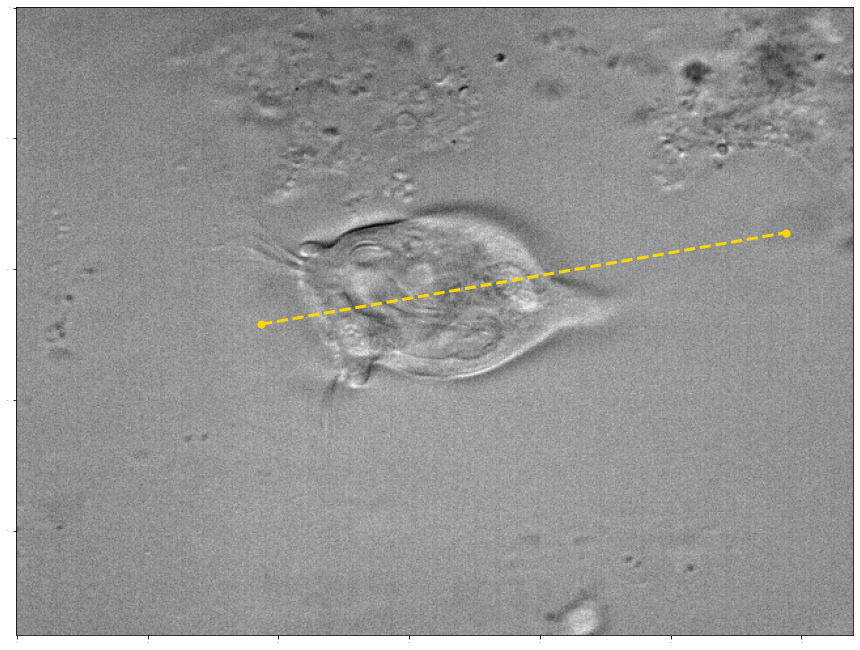

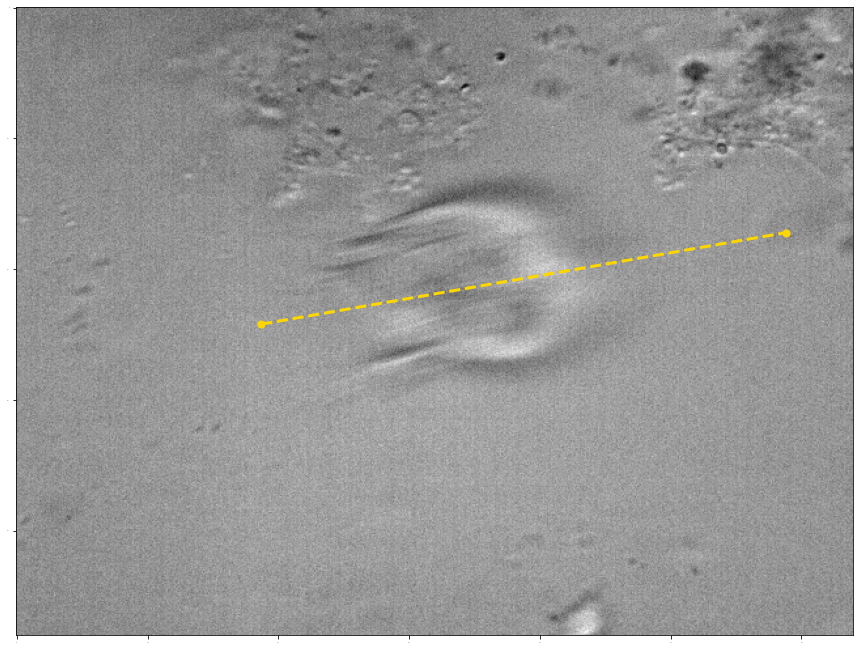

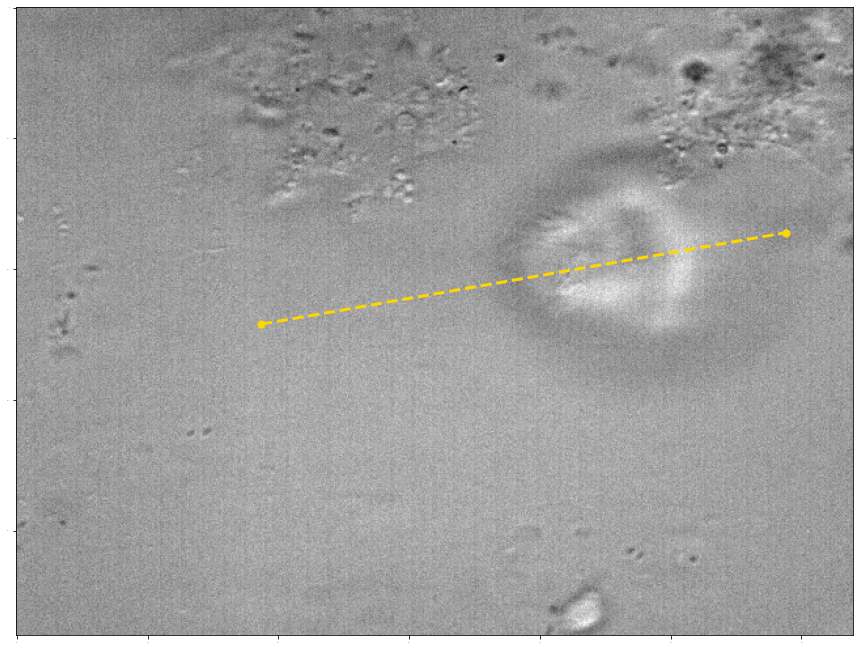

In [41]:
path = 'E:\Quarter 4.1\Prakash Lab\Squid Paper\High Speed Camera\Contraction\\2'

scale = 5.33   #pixels per micron

image_collec = os.listdir(path)
profile_max_ind = []

#line coords
src = [187,242]
dst = [588,172]

#for loop to be run over all the images
for image in image_collec: 
    folder_name = [path,'\\',image]
    file_name = ''.join(map(str, folder_name))
    read_image = io.imread(file_name)
    
    trial = color.rgb2gray(read_image)  #io.imread is better than plt.imread as it prevents data loss in coversion
    trial8 = img_as_ubyte(trial)

    int_profile = measure.profile_line(trial8, (src[1], src[0]), (dst[1], dst[0]))
    max_ind = np.where(int_profile == np.max(int_profile))
    profile_max_ind.append(max_ind[0][0])
    
#     ax1.plot()
#     ax2.imshow(trial8, cmap='gray')
#     ax2.plot([src[0],dst[0]], [src[1],dst[1]])
#     pause()

fig1, ax1 = plt.subplots(figsize=(15, 8))
ax1.set_title('Intensity Maxima Position($\mu$m) vs Time(s)', fontsize = 25)

dist = np.sqrt((588-187)**2+(172-242)**2)/scale
profile_max_position = dist/(len(int_profile)-1)*np.array(profile_max_ind)
# velocity_series = (profile_min_position[3:500] - profile_min_position[0:497])/(1/860) 
t_range = np.linspace(0,95,96)*(1/860)  #for 860 fps
ax1.plot(t_range, profile_max_position, linewidth = "3")
ax1.plot(t_range[37:41], profile_max_position[37:41], color = 'k', linewidth = "5", linestyle = 'dashed')

#average velocity calculation
total_time = (t_range[41]-t_range[37]) 
total_dist = (profile_max_position[41]-profile_max_position[37])
speed = total_dist/total_time

ax1.set_xlabel('Time(s)', fontsize = 25)
ax1.set_ylabel('Intensity Maxima Position($\mu$m)', fontsize = 25)

ax1.minorticks_on()
ax1.grid(which='major', axis='both')
# ax1.grid(which='minor', axis='x')
ax1.tick_params(axis='both', which='major', labelsize=15)
# ax.tick_params(axis='both', which='minor', labelsize=8)

ax1.text(0.8, 0.15,'Projected Contraction', horizontalalignment='center',
     verticalalignment='center', transform=ax1.transAxes, fontsize=23, color = 'k')
ax1.text(0.8, 0.075,'Speed $= 4290.13$'+' $\mu$m/s', horizontalalignment='center',
     verticalalignment='center', transform=ax1.transAxes, fontsize=23, color = 'k')


# ax1.legend(bbox_to_anchor=(0.84, 0.7), loc='upper left', borderaxespad=0., fontsize = "15")

save_path = "E:\Quarter 4.1\Prakash Lab\Squid Paper\Figures" 
save_file_name = os.path.join(save_path, 'intensity_vs_t_cont'+'.tif')
plt.savefig(save_file_name, format='tif', bbox_inches='tight', pad_inches=0.1, dpi = 300)

image = image_collec[30]
folder_name = [path,'\\',image]
file_name = ''.join(map(str, folder_name))
read_image = io.imread(file_name)
trial = color.rgb2gray(read_image)  #io.imread is better than plt.imread as it prevents data loss in coversion
trial8 = img_as_ubyte(trial)
fig2, ax2 = plt.subplots(figsize=(15, 15))
ax2.imshow(trial8, cmap='gray')
ax2.plot([src[0],dst[0]],[src[1],dst[1]], color="gold", linewidth = "3", linestyle = "dashed")
ax2.scatter([src[0],dst[0]],[src[1],dst[1]], color="gold", s = 50)
ax2.tick_params(axis='both', which='major', labelsize=0)

save_file_name = os.path.join(save_path, 'section_image_cont1'+'.tif')
plt.savefig(save_file_name, format='tif', bbox_inches='tight', pad_inches=0.1, dpi = 300)

image = image_collec[38]
folder_name = [path,'\\',image]
file_name = ''.join(map(str, folder_name))
read_image = io.imread(file_name)
trial = color.rgb2gray(read_image)  #io.imread is better than plt.imread as it prevents data loss in coversion
trial8 = img_as_ubyte(trial)
fig3, ax3 = plt.subplots(figsize=(15, 15))
ax3.imshow(trial8, cmap='gray')
ax3.plot([src[0],dst[0]],[src[1],dst[1]], color="gold", linewidth = "3", linestyle = "dashed")
ax3.scatter([src[0],dst[0]],[src[1],dst[1]], color="gold", s = 50)
ax3.tick_params(axis='both', which='major', labelsize=0)

save_file_name = os.path.join(save_path, 'section_image_cont2'+'.tif')
plt.savefig(save_file_name, format='tif', bbox_inches='tight', pad_inches=0.1, dpi = 300)

image = image_collec[45]
folder_name = [path,'\\',image]
file_name = ''.join(map(str, folder_name))
read_image = io.imread(file_name)
trial = color.rgb2gray(read_image)  #io.imread is better than plt.imread as it prevents data loss in coversion
trial8 = img_as_ubyte(trial)
fig4, ax4 = plt.subplots(figsize=(15, 15))
ax4.imshow(trial8, cmap='gray')
ax4.plot([src[0],dst[0]],[src[1],dst[1]], color="gold", linewidth = "3", linestyle = "dashed")
ax4.scatter([src[0],dst[0]],[src[1],dst[1]], color="gold", s = 50)
ax4.tick_params(axis='both', which='major', labelsize=0)

save_file_name = os.path.join(save_path, 'section_image_cont3'+'.tif')
plt.savefig(save_file_name, format='tif', bbox_inches='tight', pad_inches=0.1, dpi = 300)

In [44]:
file_name = os.path.join(save_path, 'section_image_cont3'+'.tif')
read_image = io.imread(file_name)

save_file_name = os.path.join(save_path, 'section_image_cont3_crop'+'.tif')
io.imsave(save_file_name, read_image[:,876:3584])